In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
import sklearn.metrics as sklm
%matplotlib inline
%matplotlib widget
plt.figure(figsize=(10,20))

FigureCanvasNbAgg()

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [2]:
data= pd.read_csv("Data/training.csv")
data.head()


,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [3]:
np.shape(data)

(7094, 37)

In [4]:
#checking if there are any ? in the data 
(data.astype(np.object) == '?').any() 
#checking for missing values 
print((data.astype(np.object).isnull()).any())

ID                             False
Q1                             False
Q2                             False
Q3                             False
Q4                             False
Q5                             False
Q6                             False
Q7                             False
Q8_1                           False
Q8_2                           False
Q8_3                           False
Q8_4                           False
Q8_5                           False
Q8_6                           False
Q8_7                           False
Q8_8                           False
Q8_9                           False
Q8_10                          False
Q8_11                          False
Q9                             False
Q10                            False
Q11                            False
Q12                            False
Q13                            False
Q14                            False
Q15                            False
Q16                            False
Q

In [5]:
#cheking for duplicate  
print(data.shape)
print(data.ID.unique().shape)

(7094, 37)
(7094,)


In [6]:
data.describe().round()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.0,7094.0,7094.0,7094.0,7094.0,7094.0,7094.0,7094.0,7094.0,7094.0,...,7094.0,7094.0,7094.0,7094.0,7094.0,7094.0,7094.0,7094.0,7094.0,7094.0
mean,4743.0,38.0,2.0,2.0,3.0,3.0,2.0,1.0,0.0,1.0,...,-0.0,2.0,3.0,-6.0,35.0,1.0,0.0,0.0,0.0,2.0
std,2731.0,16.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0
min,1.0,16.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,-1.0,1.0,1.0,-11.0,30.0,0.0,0.0,0.0,0.0,0.0
25%,2397.0,25.0,1.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,...,-1.0,1.0,2.0,-8.0,33.0,0.0,0.0,0.0,0.0,1.0
50%,4744.0,35.0,2.0,1.0,3.0,3.0,2.0,1.0,0.0,1.0,...,-1.0,1.0,4.0,-6.0,35.0,1.0,0.0,0.0,0.0,2.0
75%,7105.0,48.0,2.0,3.0,3.0,4.0,2.0,2.0,0.0,1.0,...,-1.0,4.0,4.0,-4.0,38.0,1.0,1.0,1.0,0.0,3.0
max,9459.0,100.0,2.0,4.0,8.0,6.0,2.0,2.0,1.0,1.0,...,5.0,5.0,5.0,-1.0,40.0,1.0,1.0,1.0,1.0,3.0


In [7]:
data.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [8]:
#Replace columns with words 
columns_dict= {"Q1":"Age","Q2":"gender","Q3":"MaritalStatus","Q4":"HLEducation","Q5":"Option1","Q6":"LandOwner","Q7":"OwnMobile","Q8":"MobileOwner",
               "Q8_1":"Salaries_Wage","Q8_2":"MoneyFromTrading","Q8_3":"MoneyFromService","Q8_4":"Piecework","Q8_5":"RentalIncome",
               "Q8_6":"InterestFromSaving","Q8_7":"Pension","Q8_8":"SocialWelfare","Q8_9":"RelyOnSomeone","Q8_10":"Don'tGetMoney",
               "Q8_11":"Other","Q9":"WhoyouWorkFor","Q10":"ThingsMainlySell","Q11":"ServiceMainlyProvide","Q12":"MoneyOutsideTanzania",
               "Q13":"LastSentMoney","Q14":"MoneyInsideTanzania","Q15":"LastRecievedMoney","Q16":"OftenUseMoMo","Q17":"OftenUseMoMobills",
               "Q18":"LiteracyinKiswhahili","Q19":"LiteracyinEnglish"}

data.rename(columns=columns_dict, inplace=True)
data.columns

Index(['ID', 'Age', 'gender', 'MaritalStatus', 'HLEducation', 'Option1',
       'LandOwner', 'OwnMobile', 'Salaries_Wage', 'MoneyFromTrading',
       'MoneyFromService', 'Piecework', 'RentalIncome', 'InterestFromSaving',
       'Pension', 'SocialWelfare', 'RelyOnSomeone', 'Don'tGetMoney', 'Other',
       'WhoyouWorkFor', 'ThingsMainlySell', 'ServiceMainlyProvide',
       'MoneyOutsideTanzania', 'LastSentMoney', 'MoneyInsideTanzania',
       'LastRecievedMoney', 'OftenUseMoMo', 'OftenUseMoMobills',
       'LiteracyinKiswhahili', 'LiteracyinEnglish', 'Latitude', 'Longitude',
       'mobile_money', 'savings', 'borrowing', 'insurance',
       'mobile_money_classification'],
      dtype='object')

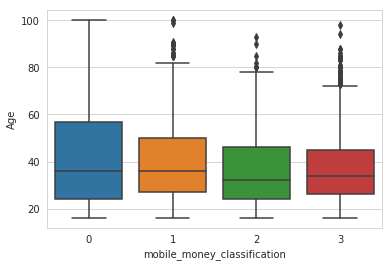

In [9]:
## func for plotting box plot 
def plot_box(data, cols, col_x= 'mobile_money_classification'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(col_x, col, data= data)
        plt.xlabel(col_x)
        plt.ylabel(col) 
        plt.show()
        
cols=['Age']
plot_box(data, cols)

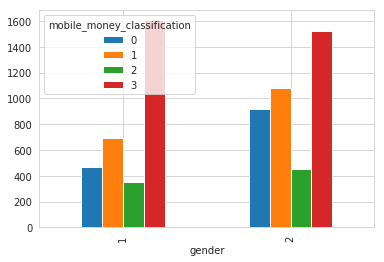

In [10]:
data1= data.groupby(['gender','mobile_money_classification']).size().unstack().plot(kind= 'bar')

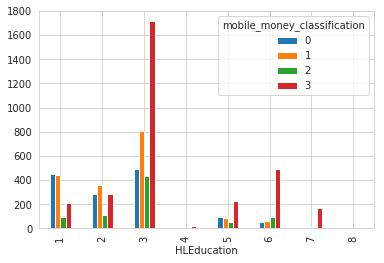

In [11]:
data1= data.groupby(['HLEducation','mobile_money_classification']).size().unstack().plot(kind= 'bar')

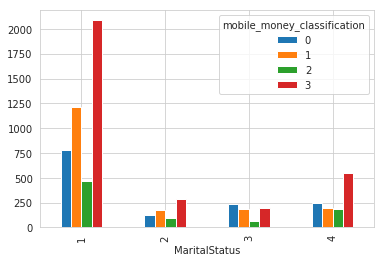

In [12]:
data1= data.groupby(['MaritalStatus','mobile_money_classification']).size().unstack().plot(kind= 'bar')

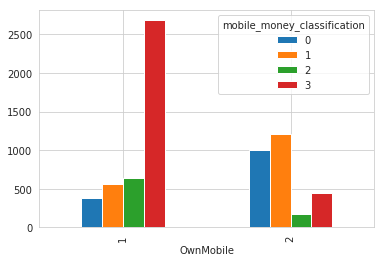

In [13]:
data1= data.groupby(['OwnMobile','mobile_money_classification']).size().unstack().plot(kind= 'bar')

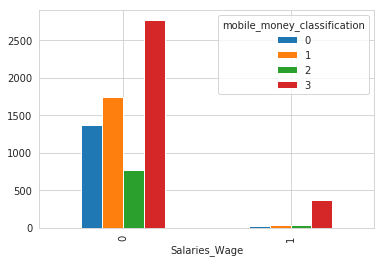

In [14]:
data1= data.groupby(['Salaries_Wage','mobile_money_classification']).size().unstack().plot(kind= 'bar')

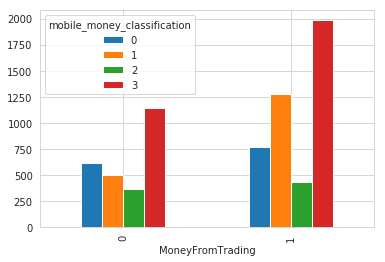

In [15]:
data1= data.groupby(['MoneyFromTrading','mobile_money_classification']).size().unstack().plot(kind= 'bar')

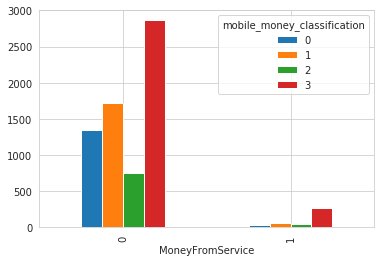

In [16]:
data1= data.groupby(['MoneyFromService','mobile_money_classification']).size().unstack().plot(kind= 'bar')

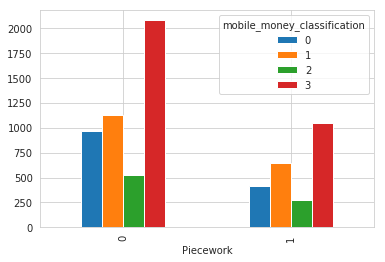

In [17]:
data1= data.groupby(['Piecework','mobile_money_classification']).size().unstack().plot(kind= 'bar')

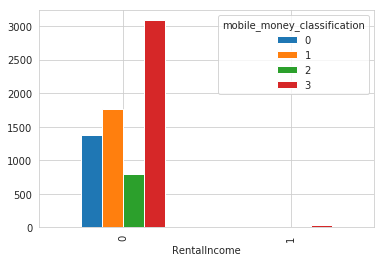

In [18]:
data1= data.groupby(['RentalIncome','mobile_money_classification']).size().unstack().plot(kind= 'bar')

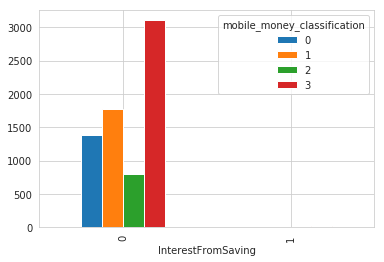

In [19]:
data1= data.groupby(['InterestFromSaving','mobile_money_classification']).size().unstack().plot(kind= 'bar')

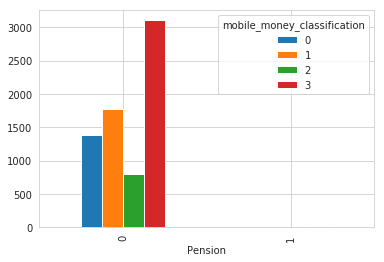

In [20]:
data1= data.groupby(['Pension','mobile_money_classification']).size().unstack().plot(kind= 'bar')

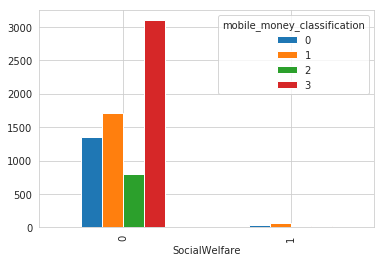

In [21]:
data1= data.groupby(['SocialWelfare','mobile_money_classification']).size().unstack().plot(kind= 'bar')

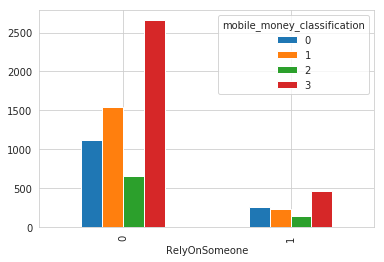

In [22]:
data1= data.groupby(['RelyOnSomeone','mobile_money_classification']).size().unstack().plot(kind= 'bar')

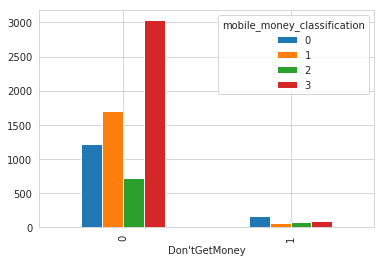

In [23]:
data1= data.groupby(["Don'tGetMoney",'mobile_money_classification']).size().unstack().plot(kind= 'bar')

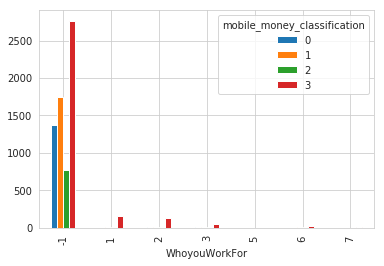

In [24]:
data1= data.groupby(['WhoyouWorkFor','mobile_money_classification']).size().unstack().plot(kind= 'bar')

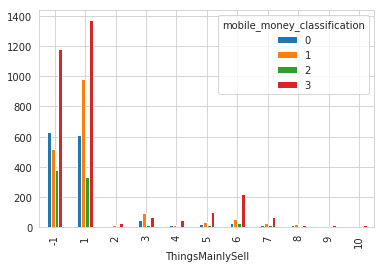

In [25]:
data1= data.groupby(['ThingsMainlySell','mobile_money_classification']).size().unstack().plot(kind= 'bar')

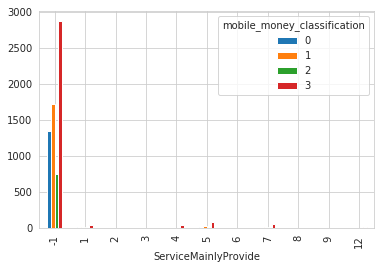

In [26]:
data1= data.groupby(['ServiceMainlyProvide','mobile_money_classification']).size().unstack().plot(kind= 'bar')

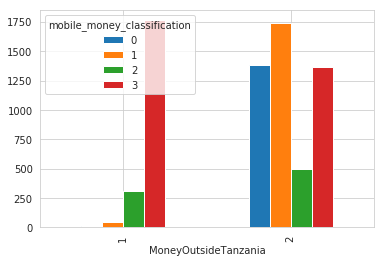

In [27]:
data1= data.groupby(['MoneyOutsideTanzania','mobile_money_classification']).size().unstack().plot(kind= 'bar')

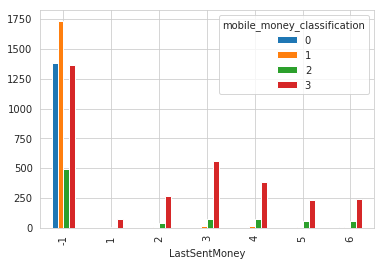

In [28]:
data1= data.groupby(['LastSentMoney','mobile_money_classification']).size().unstack().plot(kind= 'bar') 

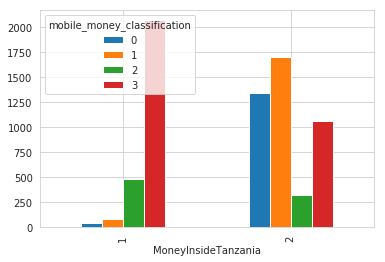

In [29]:
data1= data.groupby(['MoneyInsideTanzania','mobile_money_classification']).size().unstack().plot(kind= 'bar')

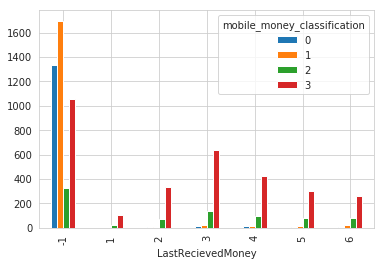

In [30]:
data1= data.groupby(['LastRecievedMoney','mobile_money_classification']).size().unstack().plot(kind= 'bar') 

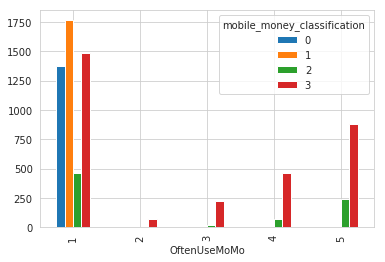

In [31]:
data1= data.groupby(['OftenUseMoMo','mobile_money_classification']).size().unstack().plot(kind= 'bar')

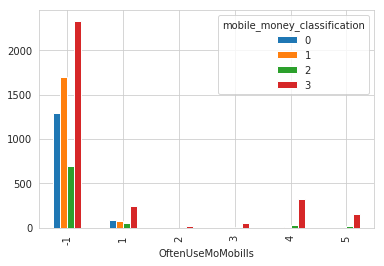

In [32]:
data1= data.groupby(['OftenUseMoMobills','mobile_money_classification']).size().unstack().plot(kind= 'bar')

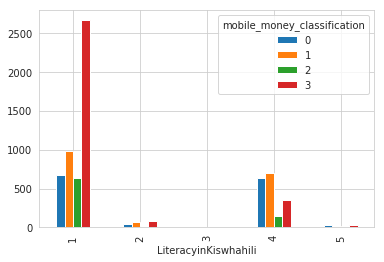

In [33]:
data1= data.groupby(['LiteracyinKiswhahili','mobile_money_classification']).size().unstack().plot(kind= 'bar')

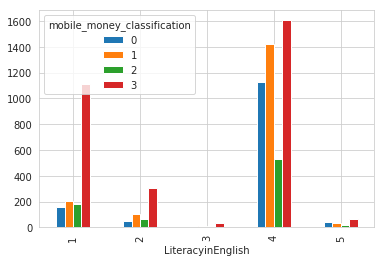

In [34]:
data1= data.groupby(['LiteracyinEnglish','mobile_money_classification']).size().unstack().plot(kind= 'bar')

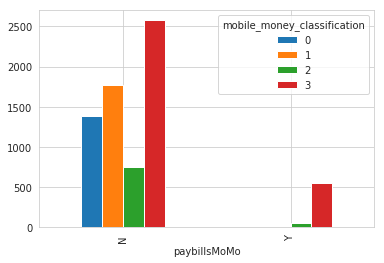

In [35]:
#trying to generate features 
pay_bills= []
def generate_paybills(data, pay_bills):
    for index, row in data.iterrows():
        if row.OftenUseMoMobills > 1:
            pay_bills.append('Y')
        else:
            pay_bills.append('N')
    return pay_bills

data['paybillsMoMo']= generate_paybills(data,pay_bills)
data1= data.groupby(['paybillsMoMo','mobile_money_classification']).size().unstack().plot(kind= 'bar')

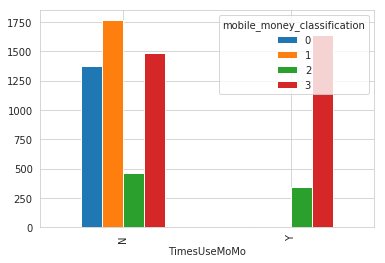

In [36]:
#trying to generate features 
often_useMoMo= []
def generate_UseMoMo(data, often_useMoMo):
    for index, row in data.iterrows():
        if row.OftenUseMoMo > 1:
            often_useMoMo.append('Y')
        else:
            often_useMoMo.append('N')
    return often_useMoMo

data['TimesUseMoMo']= generate_UseMoMo(data,often_useMoMo)
data1= data.groupby(['TimesUseMoMo','mobile_money_classification']).size().unstack().plot(kind= 'bar')

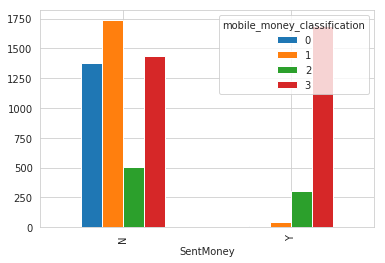

In [37]:
'LastSentMoney'
#trying to generate features 
last_sentMoney= []
def generate_SentMoney(data, last_sentMoney):
    for index, row in data.iterrows():
        if row.LastSentMoney > 1:
            last_sentMoney.append('Y')
        else:
            last_sentMoney.append('N')
    return last_sentMoney

data['SentMoney']= generate_SentMoney(data,last_sentMoney)
data1= data.groupby(['SentMoney','mobile_money_classification']).size().unstack().plot(kind= 'bar')

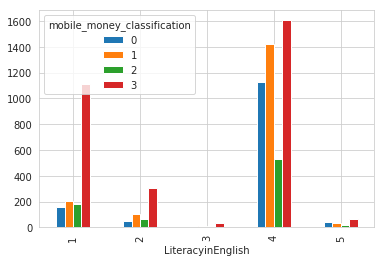

In [38]:
data1= data.groupby(['LiteracyinEnglish','mobile_money_classification']).size().unstack().plot(kind= 'bar')

In [40]:
features_chosen=['gender','MaritalStatus','HLEducation','OwnMobile','LiteracyinKiswhahili','LiteracyinEnglish','MoneyInsideTanzania',
                'MoneyOutsideTanzania']
features= data[features_chosen]
features.head()


,gender,MaritalStatus,HLEducation,OwnMobile,LiteracyinKiswhahili,LiteracyinEnglish,MoneyInsideTanzania,MoneyOutsideTanzania
0,2,3,1,2,4,4,2,2
1,1,1,3,1,1,4,1,1
2,2,4,6,1,1,1,2,2
3,1,1,3,1,1,4,2,1
4,1,1,1,1,1,4,1,2


In [41]:
# converting data types to categorical features 
features['gender']= features['gender'].astype('category')
features['MaritalStatus']= features['MaritalStatus'].astype('category')
features['HLEducation']= features['HLEducation'].astype('category')
features['OwnMobile']= features['OwnMobile'].astype('category')
features['LiteracyinKiswhahili']= features['LiteracyinKiswhahili'].astype('category')
features['LiteracyinEnglish']= features['LiteracyinEnglish'].astype('category')
features['MoneyInsideTanzania']= features['MoneyInsideTanzania'].astype('category')
features['MoneyOutsideTanzania']= features['MoneyOutsideTanzania'].astype('category')
print(features.dtypes)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

gender                  category
MaritalStatus           category
HLEducation             category
OwnMobile               category
LiteracyinKiswhahili    category
LiteracyinEnglish       category
MoneyInsideTanzania     category
MoneyOutsideTanzania    category
dtype: object


/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  i

In [42]:
labels= np.array(data.mobile_money_classification)
labels=pd.get_dummies(data.mobile_money_classification)
labels= labels.values
print(labels)

[[1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 ...
 [1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]]


In [43]:
features.head()

,gender,MaritalStatus,HLEducation,OwnMobile,LiteracyinKiswhahili,LiteracyinEnglish,MoneyInsideTanzania,MoneyOutsideTanzania
0,2,3,1,2,4,4,2,2
1,1,1,3,1,1,4,1,1
2,2,4,6,1,1,1,2,2
3,1,1,3,1,1,4,2,1
4,1,1,1,1,1,4,1,2


In [44]:
#encoding into dummy variables and converting to array
features= pd.get_dummies(features)
features= features.values


In [45]:
features[1]

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.7, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2128, 30) (2128, 4)
(4966, 30) (4966, 4)


In [142]:
def print_matrics(y_test, prediction):
    cm=sklm.confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))
    df_cm= pd.DataFrame(cm)
    plt.figure(figsize=(5.5,4))
    print(sklm.classification_report(y_test, prediction))
    print(' ')
    print('Accuracy %0.2f' % sklm.accuracy_score(y_test,prediction))
    print(sns.heatmap(df_cm, annot=True))
    plt.title('Model Accuracy: {0:.2f}'.format(sklm.accuracy_score(y_test,prediction)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

FigureCanvasNbAgg()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.57      0.15      0.24       995
           1       0.54      0.52      0.53      1236
           2       0.00      0.00      0.00       523
           3       0.81      0.77      0.79      2212

   micro avg       0.70      0.50      0.59      4966
   macro avg       0.48      0.36      0.39      4966
weighted avg       0.61      0.50      0.53      4966
 samples avg       0.50      0.50      0.50      4966

 
Accuracy 0.49
AxesSubplot(0.125,0.125;0.62x0.755)


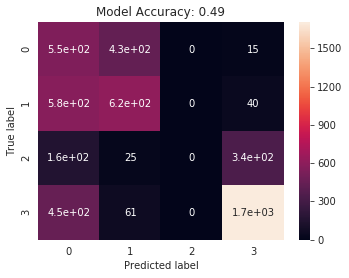

In [144]:
model_lSVC= OneVsRestClassifier(LinearSVC(), n_jobs=1)
model_lSVC.fit(X_train,y_train)
prediction= model_lSVC.predict(X_test)
print_matrics(y_test, prediction)

In [147]:
cali_lsvc= CalibratedClassifierCV(LinearSVC())
model_ClSVC= OneVsRestClassifier(cali_lsvc, n_jobs=1)
model_ClSVC.fit(X_train,y_train)
prediction= model_ClSVC.predict_proba(X_test)
print(log_loss(y_test, prediction, eps=1e-15))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8790140343247753


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


FigureCanvasNbAgg()

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       995
           1       0.50      0.66      0.57      1236
           2       0.20      0.04      0.07       523
           3       0.79      0.76      0.77      2212

   micro avg       0.61      0.61      0.61      4966
   macro avg       0.49      0.49      0.47      4966
weighted avg       0.59      0.61      0.59      4966
 samples avg       0.50      0.61      0.53      4966

 
Accuracy 0.38
AxesSubplot(0.125,0.125;0.62x0.755)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


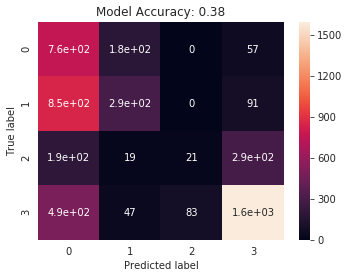

In [148]:
model_MNB= OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None), n_jobs=1)
model_MNB.fit(X_train,y_train)
prediction= model_MNB.predict(X_test)
print_matrics(y_test, prediction)

In [149]:
cali_MNB= CalibratedClassifierCV(MultinomialNB(fit_prior=True, class_prior=None))
model_MNB= OneVsRestClassifier(cali_MNB, n_jobs=1)
model_MNB.fit(X_train,y_train)
prediction= model_MNB.predict_proba(X_test)
print(log_loss(y_test, prediction, eps=1e-15))

0.9474213559406489


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


FigureCanvasNbAgg()

              precision    recall  f1-score   support

           0       0.53      0.25      0.34       995
           1       0.54      0.51      0.53      1236
           2       0.33      0.00      0.00       523
           3       0.81      0.75      0.78      2212

   micro avg       0.69      0.51      0.59      4966
   macro avg       0.56      0.38      0.41      4966
weighted avg       0.64      0.51      0.55      4966
 samples avg       0.49      0.51      0.50      4966

 
Accuracy 0.47
AxesSubplot(0.125,0.125;0.62x0.755)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


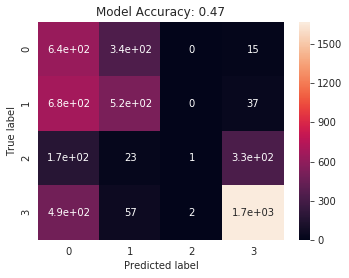

In [150]:
model_LR= OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)
model_LR.fit(X_train,y_train)
prediction= model_LR.predict(X_test)
print_matrics(y_test, prediction)

In [151]:
cali_LR= CalibratedClassifierCV(LogisticRegression(solver='sag'))
model_LR= OneVsRestClassifier(cali_LR, n_jobs=1)
model_LR.fit(X_train,y_train)
prediction= model_LR.predict_proba(X_test)
print(log_loss(y_test, prediction, eps=1e-15))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8670545217660008


FigureCanvasNbAgg()

              precision    recall  f1-score   support

           0       0.55      0.19      0.28       995
           1       0.50      0.52      0.51      1236
           2       0.28      0.02      0.04       523
           3       0.79      0.83      0.81      2212

   micro avg       0.67      0.54      0.60      4966
   macro avg       0.53      0.39      0.41      4966
weighted avg       0.62      0.54      0.55      4966
 samples avg       0.54      0.54      0.54      4966

 
Accuracy 0.53
AxesSubplot(0.125,0.125;0.62x0.755)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


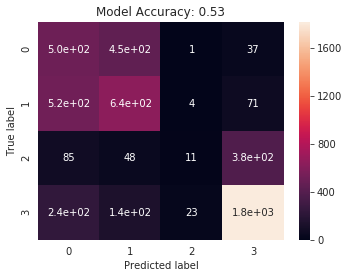

In [152]:
model_XGB=OneVsRestClassifier(XGBClassifier())
model_XGB.fit(X_train,y_train)
prediction= model_XGB.predict(X_test)
print_matrics(y_test, prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[[6.24221956e-01 3.31122252e-01 1.52706590e-01 4.56902540e-02]
 [3.21635233e-01 5.94120585e-01 9.63586125e-02 8.58286455e-02]
 [7.30239980e-04 8.49382399e-03 2.04956479e-01 9.29061673e-01]
 ...
 [7.49086789e-04 5.39559135e-03 1.68579137e-01 9.41508777e-01]
 [1.43860994e-02 8.36435403e-02 1.01491608e-01 6.63302929e-01]
 [6.17658513e-01 2.79781925e-01 9.26878248e-02 7.88379045e-02]]
0.8670545217660008
0.6194120016109544


FigureCanvasNbAgg()

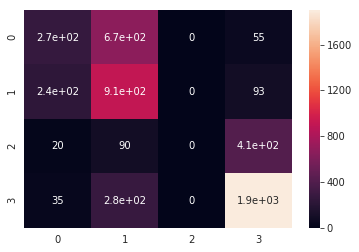

In [190]:
cali_XGB= CalibratedClassifierCV(XGBClassifier())
model_XGB= OneVsRestClassifier(cali_XGB, n_jobs=1)
model_XGB.fit(X_train,y_train)
prediction= model_LR.predict_proba(X_test)
print(prediction)
print(log_loss(y_test, prediction, eps=1e-15))
print(accuracy_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
#############
cds=sklm.confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))
df_cds=pd.DataFrame(cds)
sns.heatmap(cds, annot=True)

In [191]:
model= LinearSVC()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

ValueError: bad input shape (2128, 4)

In [ ]:
cds=multilabel_confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))
sns.heatmap(cds, annot=True)

In [65]:
mcm= multilabel_confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
#true postive rate 
print(tp/ (tp+fn))
#true negative rate 
print(tn/(tn+fp))
#false postive rate
print(fp/(fp +tn))
#false negative rate 
print(fn/(fn+tp))
#hamming loss 
hamming_loss(y_test.argmax(axis=1), prediction.argmax(axis=1))

[0.27035176 0.73381877 0.         0.85895118]
[0.92671871 0.72171582 1.         0.7962963 ]
[0.07328129 0.27828418 0.         0.2037037 ]
[0.72964824 0.26618123 1.         0.14104882]


FigureCanvasNbAgg()

              precision    recall  f1-score   support

           0       0.54      0.20      0.29       995
           1       0.51      0.53      0.52      1236
           2       0.28      0.02      0.04       523
           3       0.79      0.82      0.80      2212

   micro avg       0.67      0.54      0.60      4966
   macro avg       0.53      0.39      0.41      4966
weighted avg       0.62      0.54      0.55      4966
 samples avg       0.53      0.54      0.53      4966

 
Accuracy 0.53
AxesSubplot(0.125,0.125;0.62x0.755)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


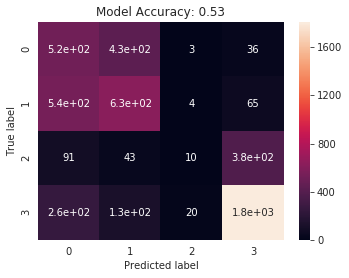

In [153]:
model_GBC=OneVsRestClassifier(GradientBoostingClassifier())
model_GBC.fit(X_train,y_train)
prediction= model_GBC.predict(X_test)
print_matrics(y_test, prediction)

In [154]:
cali_GBC= CalibratedClassifierCV(GradientBoostingClassifier())
model_GBC= OneVsRestClassifier(cali_GBC, n_jobs=1)
model_GBC.fit(X_train,y_train)
prediction= model_GBC.predict_proba(X_test)
print(log_loss(y_test, prediction, eps=1e-15))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8592926212092555


From all the model tested, It can be seen that LinearSVC model does best compared to the rest. 

In [ ]:
final= pd.read_csv('Data/test.csv')
final.rename(columns=columns_dict, inplace=True)
final.columns

In [ ]:
final_features= final[features_chosen]

In [ ]:
# converting data types to categorical features and encoding
final_features['gender']= final_features['gender'].astype('category')
final_features['MaritalStatus']= final_features['MaritalStatus'].astype('category')
final_features['HLEducation']= final_features['HLEducation'].astype('category')
final_features['OwnMobile']= final_features['OwnMobile'].astype('category')
final_features['LiteracyinKiswhahili']= final_features['LiteracyinKiswhahili'].astype('category')
final_features['LiteracyinEnglish']= final_features['LiteracyinEnglish'].astype('category')
final_features['MoneyInsideTanzania']= final_features['MoneyInsideTanzania'].astype('category')
final_features['MoneyOutsideTanzania']= final_features['MoneyOutsideTanzania'].astype('category')

final_features= pd.get_dummies(final_features)
final_features= final_features.values

In [ ]:
solution= model_XGB.predict_proba(final_features)
print(solution)

In [ ]:
final_solution= pd.DataFrame(solution, columns=[['no_financial_services','other_only','mm_only','mm_plus']])
ID= pd.DataFrame(final['ID'])
final_submit= pd.concat([ID, final_solution], axis=1).to_csv('solution.csv',index=False)